In [40]:
import matplotlib.pyplot as plt
from latex import latexify
import numpy as np
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

latexify(columns = 2)

In [41]:
def getNewTimes():
    MeatTimes, UserTimes, SysTimes, CPUTimes = [], [], [], []
    with open("output.txt") as f:
        lines = f.readlines()
        for i in range(0, len(lines), 2):
            MeatTimes.append(float(lines[i].split(" ")[8][:-2]))
            UserTimes.append(float(lines[i+1].split(" ")[2][:-1]))
            SysTimes.append(float(lines[i+1].split(" ")[4][:-1]))
            CPUTimes.append(float(lines[i+1].split(" ")[2][:-1]) + float(lines[i+1].split(" ")[4][:-1]))
    
    return MeatTimes, UserTimes, SysTimes, CPUTimes

In [42]:
mT, uT, sT, cT = getNewTimes()

In [43]:
mT

[0.00539, 0.033538, 0.14055, 0.828482, 7.169196]

In [44]:
uT

[0.01, 0.04, 0.15, 0.84, 7.23]

In [45]:
sT

[0.0, 0.0, 0.0, 0.0, 0.03]

In [46]:
cT

[0.01, 0.04, 0.15, 0.84, 7.260000000000001]

In [47]:
T = [mT, uT, sT, cT]
df = pd.DataFrame(T, index = ["Meat Portion Time", "User Time", "System Time", "CPU Time"], columns = [64, 128, 256, 512, 1024])
df.to_csv("CPPDouble.csv")
df
# df = pd.read_csv("PythonInteger.csv")
# T = df.to_numpy().tolist()
# mT, uT, sT, cT = T[0][1:], T[1][1:], T[2][1:], T[3][1:]
# # df

,64,128,256,512,1024
Meat Portion Time,0.00539,0.033538,0.14055,0.828482,7.169196
User Time,0.01000,0.040000,0.15000,0.840000,7.230000
System Time,0.00000,0.000000,0.00000,0.000000,0.030000
CPU Time,0.01000,0.040000,0.15000,0.840000,7.260000


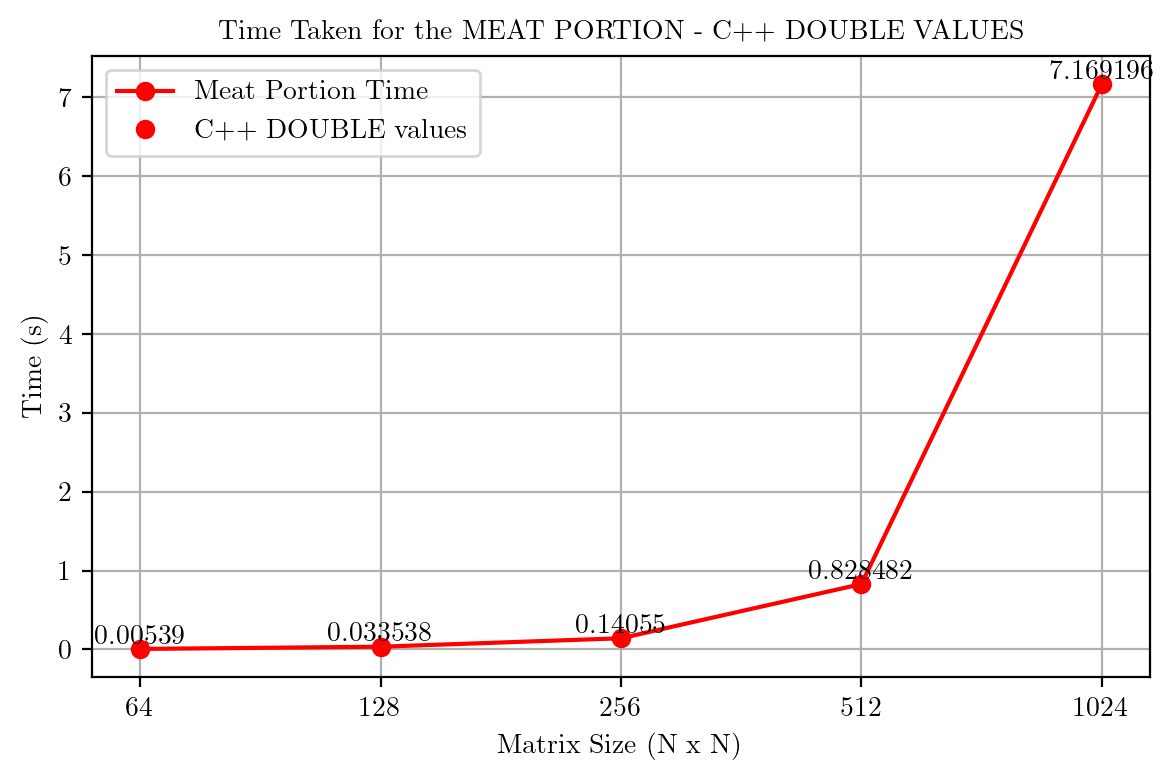

In [48]:
plt.figure(figsize = (6, 4))
plt.plot(mT, color = "red", marker = "o", label = "Meat Portion Time")
plt.plot([], [], 'o', color = "red", label = "C++ DOUBLE values")
for i in range(5):
    plt.text(i, mT[i], f"{mT[i]}", ha = "center", va = "bottom")
plt.xticks(np.arange(5), np.array([64, 128, 256, 512, 1024]))
plt.xlabel("Matrix Size (N x N)")
plt.ylabel("Time (s)")
plt.title("Time Taken for the MEAT PORTION - C++ DOUBLE VALUES")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

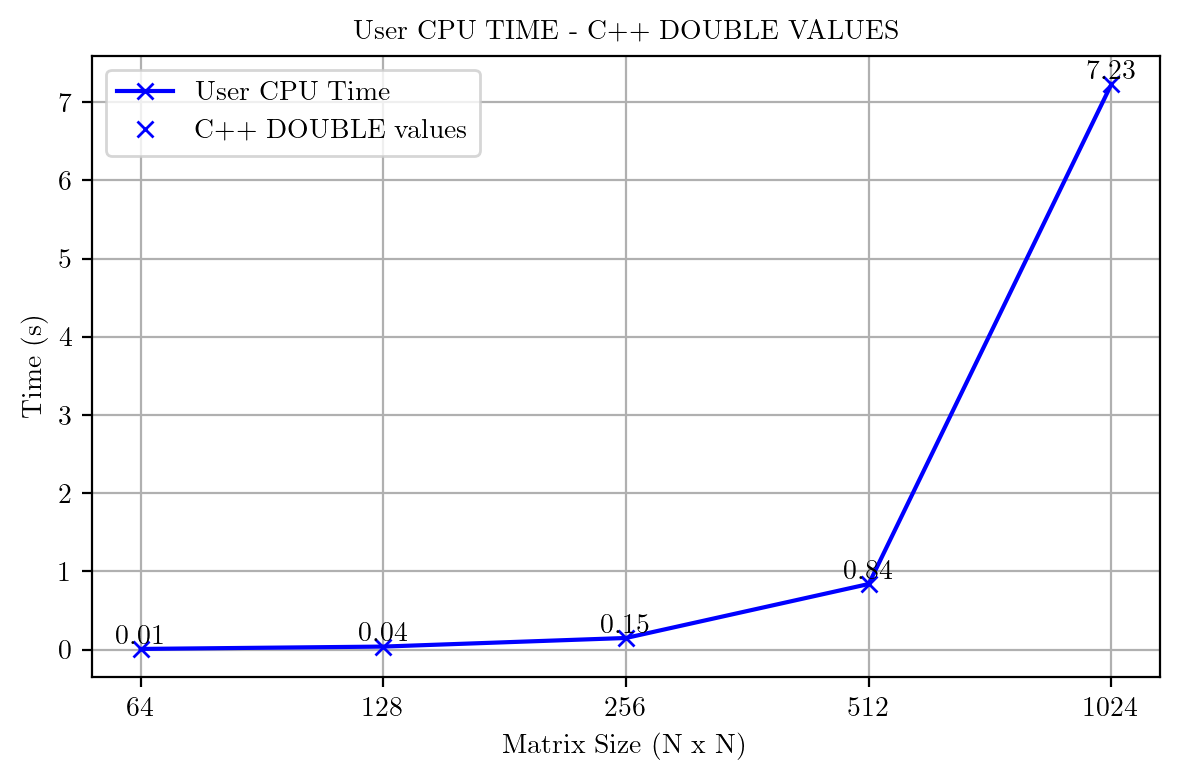

In [49]:
plt.figure(figsize = (6, 4))
plt.plot(uT, color = "blue", marker = "x", label = "User CPU Time")
plt.plot([], [], 'x', color = "blue", label = "C++ DOUBLE values")
for i in range(5):
    plt.text(i, uT[i], f"{uT[i]}", ha = "center", va = "bottom")
plt.xticks(np.arange(5), np.array([64, 128, 256, 512, 1024]))
plt.xlabel("Matrix Size (N x N)")
plt.ylabel("Time (s)")
plt.title("User CPU TIME - C++ DOUBLE VALUES")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

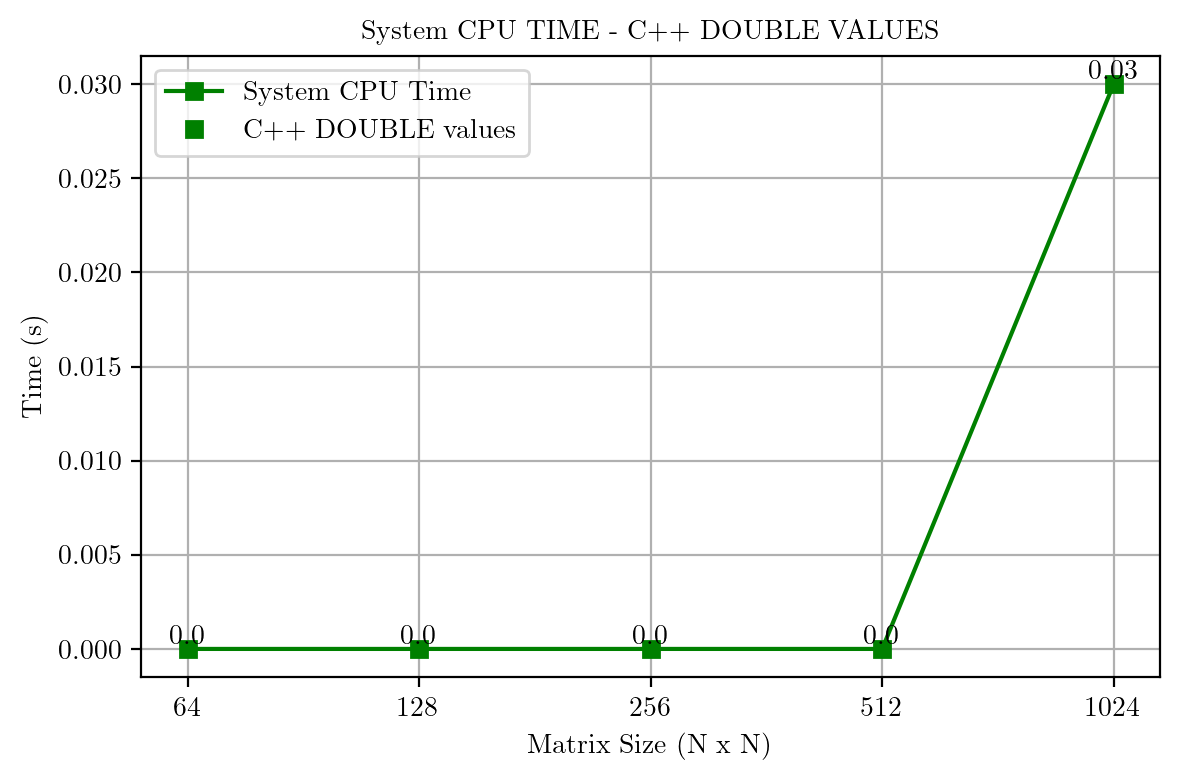

In [50]:
plt.figure(figsize = (6, 4))
plt.plot(sT, color = "green", marker = "s", label = "System CPU Time")
plt.plot([], [], 's', color = "green", label = "C++ DOUBLE values")
for i in range(5):
    plt.text(i, sT[i], f"{sT[i]}", ha = "center", va = "bottom")
plt.xticks(np.arange(5), np.array([64, 128, 256, 512, 1024]))
plt.xlabel("Matrix Size (N x N)")
plt.ylabel("Time (s)")
plt.title("System CPU TIME - C++ DOUBLE VALUES")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

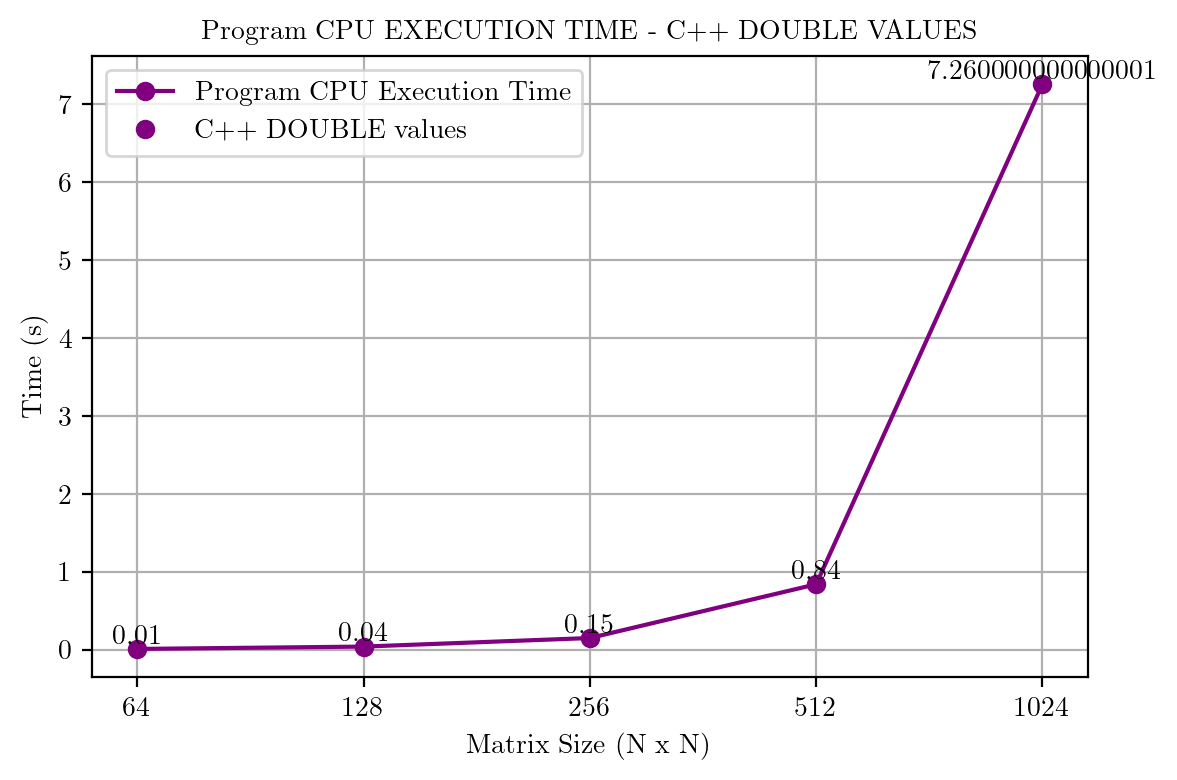

In [51]:
plt.figure(figsize = (6, 4))
plt.plot(cT, color = "purple", marker = "o", label = "Program CPU Execution Time")
plt.plot([], [], 'o', color = "purple", label = "C++ DOUBLE values")
for i in range(5):
    plt.text(i, cT[i], f"{cT[i]}", ha = "center", va = "bottom")
plt.xticks(np.arange(5), np.array([64, 128, 256, 512, 1024]))
plt.xlabel("Matrix Size (N x N)")
plt.ylabel("Time (s)")
plt.title("Program CPU EXECUTION TIME - C++ DOUBLE VALUES")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [52]:
# evaluate the execution time for the meat portions of the program and how much proportion is it w.r.t. total program execution time.  

prop = [mT[i]/cT[i] * 100 for i in range(5)]
prop

[53.89999999999999, 83.845, 93.7, 98.62880952380954, 98.7492561983471]

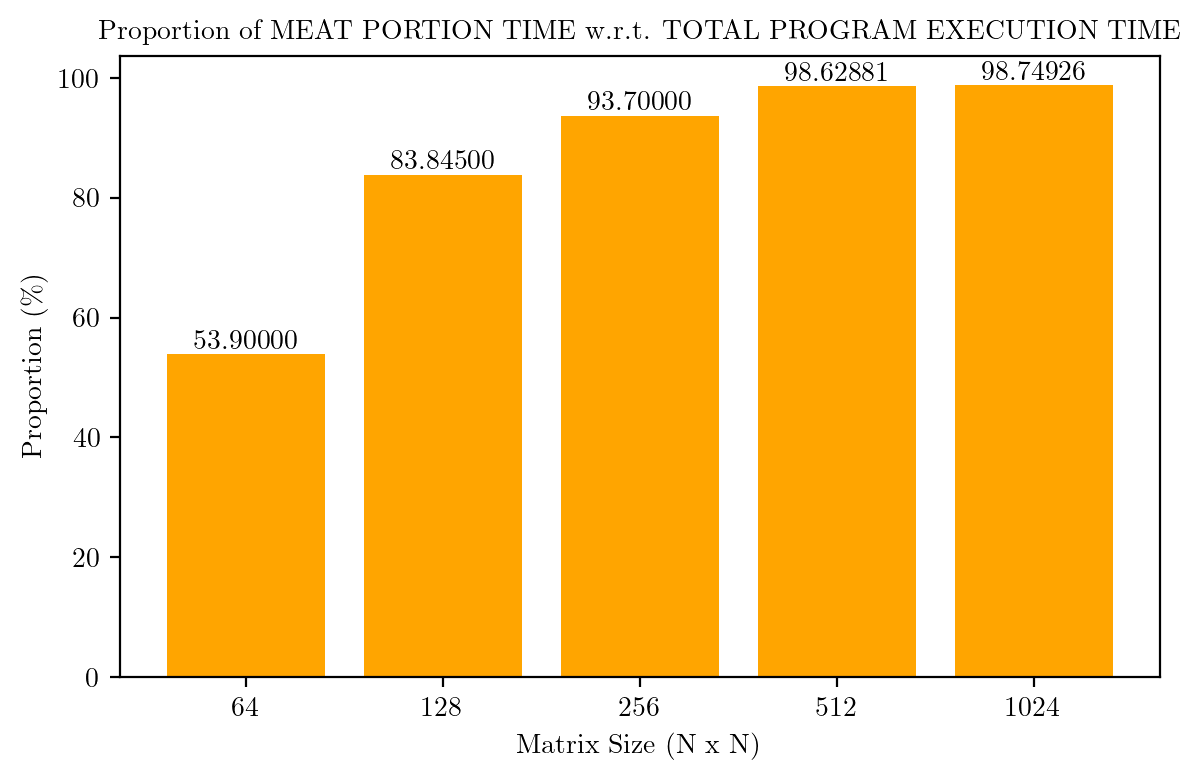

In [53]:
plt.figure(figsize = (6, 4))
# bar plot for proportion of meat portion time w.r.t. total program execution time
plt.bar(np.arange(5), prop, color = "orange")
# plot the values on top of the bars
for i in range(5):
    plt.text(i, prop[i], f"{prop[i]:.5f}", ha = "center", va = "bottom")
plt.xticks(np.arange(5), np.array([64, 128, 256, 512, 1024]))
plt.xlabel("Matrix Size (N x N)")
plt.ylabel(fr"Proportion (\%)")
plt.title("Proportion of MEAT PORTION TIME w.r.t. TOTAL PROGRAM EXECUTION TIME")
plt.tight_layout()
plt.show()